In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df =pd.read_csv('/Users/mafredtucker/Documents/GitHub/ML-AI/ML-Work-2/Performance.csv')

In [15]:
df.head(10)

,student_id,gender,age,grade_level,english_score,math_score,science_score,social_studies_score,total_score
0,1,M,16,11,80,90,85,75,330
1,2,F,15,10,70,80,92,78,320
2,3,F,17,12,88,72,90,80,330
3,4,M,16,11,65,82,78,85,310
4,5,F,14,9,75,88,85,80,328
5,6,F,17,12,95,85,92,90,362
6,7,M,15,10,82,95,88,78,343
7,8,F,16,11,68,75,80,72,295
8,9,F,14,9,85,82,90,88,345
9,10,M,17,12,78,80,82,88,328


In [13]:
df.tail()

,student_id,gender,age,grade_level,english_score,math_score,science_score,social_studies_score,total_score
35,36,F,16,11,83,86,87,84,340
36,37,F,17,12,91,93,92,90,366
37,38,M,16,11,86,87,85,82,340
38,39,F,15,10,89,90,92,88,359
39,40,M,15,9,80,82,81,75,318


In [14]:
mf = df['gender'].value_counts()
mf


gender
F    21
M    19
Name: count, dtype: int64

In [6]:
average_age =df['age'].mean()
print(average_age)


15.675


In [7]:
df.isnull().sum()

student_id              0
gender                  0
age                     0
grade_level             0
english_score           0
math_score              0
science_score           0
social_studies_score    0
dtype: int64

In [8]:
English_scores = df['english_score'].max() -df['english_score'].min()
English_scores

30

In [9]:
corr_coeff = df['english_score'].corr(df['science_score'])
corr_coeff

0.6293841680797964

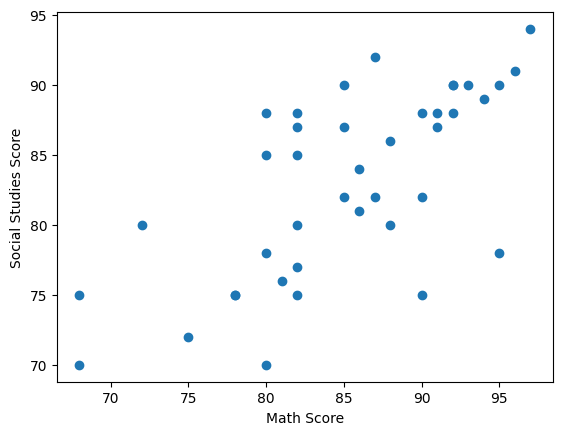

In [10]:
plt.scatter(df['math_score'], df['social_studies_score'])
plt.xlabel('Math Score')
plt.ylabel('Social Studies Score')
plt.show()

In [11]:
df['total_score'] = df['english_score'] + df['math_score'] + df['science_score'] + df['social_studies_score']
highest_score = df['total_score'].max()
highest_score_student = df.loc[df['total_score'] == highest_score]
print(highest_score_student[['student_id', 'english_score', 'math_score', 'science_score', 'social_studies_score']])

    student_id  english_score  math_score  science_score  social_studies_score
31          32             95          97             96                    94


In [12]:
# Calculate quartiles and IQR
Quan1 = df.quantile(0.25)
Quan3 = df.quantile(0.75)
IQR = Quan3 - Quan1

# Identify outliers
outliers = ((df < (Quan1 - 1.5 * IQR)) | (df > (Quan3 + 1.5 * IQR))).any(axis=1)

# Print outliers
print("Outliers:")
print(df[outliers])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns


In [ ]:
std_dev = np.std(df['english_score'])

print("Standard Deviation of English Scores is ", std_dev)

In [ ]:
plt.hist(df['math_score'], bins=5)

plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
median_sci_score = np.median(df['science_score'])

print("The Median Science Score is ", median_sci_score)

In [ ]:
english_scores = df['english_score']
Quan1 = english_scores.quantile(0.25)
Quan3 = english_scores.quantile(0.75)
IQR = Quan3 - Quan1

print("IQR of English Scores is ", IQR)

In [ ]:
english_total = df['english_score'].sum()
math_total = df['math_score'].sum()
science_total = df['science_score'].sum()
social_studies_total = df['social_studies_score'].sum()

max_total = max(english_total, math_total, science_total, social_studies_total)
if max_total == english_total:
    subject = 'English'
elif max_total == science_total:
    subject = 'Science'
elif max_total == math_total:
    subject = 'Math'
else:
    subject = 'social studies'
    
print(" The subject with the highest overall score is ", subject)

In [ ]:
grouped = df.groupby('gender')['math_score']

fig, ax = plt.subplots()
ax.boxplot([grouped.get_group('M'), grouped.get_group('F')])

ax.set_xticklabels(['Male', 'Female'])
ax.set_xlabel('Gender')
ax.set_ylabel('Math Score')
ax.set_title('Math Scores Based on Gender')

plt.show()

In [ ]:
mode_grade = df['grade_level'].mode()[0]

print("The mode of grades is ", mode_grade)

In [ ]:
print(df.isnull().sum())

In [ ]:
corr_matrix = df.corr()

print("Correlation Matrix: ")
print(corr_matrix)

corr_threshold = 0.7
corr_pairs = {}

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs[(col1, col2)] = corr_matrix.iloc[i, j]
            
if len(corr_pairs) > 0:
    print("\nHighly correlated variables: ")
    for pair, corr in corr_pairs.items():
        print(pair[0], "-", pair[1], ":", corr)
else:
    print("\nLow correlated variables: ")

In [ ]:
sns.pairplot(df, diag_kind='hist')

In [ ]:
age_range = df['age'].max() - df['age'].min()
print("The range of ages in the dataset is ", age_range)

In [ ]:
scores = df[['english_score', 'math_score', 'science_score', 'social_studies_score']]

totals = scores.sum(axis=1)

lowest_scoring_student_id = totals.idxmin()

print(df.loc[lowest_scoring_student_id])

In [ ]:
mean_math_score = df['math_score'].mean()
median_math_score = df['math_score'].median()

difference = mean_math_score - median_math_score

print('Mean_math_score: ', mean_math_score)
print('Median_math_score', median_math_score)
print('Difference:', difference)

In [ ]:
ss_score = df.loc[df['student_id'] == 15, 'social_studies_score'].iloc[0]

ss_mean = df['social_studies_score'].mean()
ss_std = df['social_studies_score'].std()

ss_zscore = (ss_score - ss_mean) / ss_std

print(f"The z-score for the social studies score of student ID 15 is {ss_zscore:.2f}")